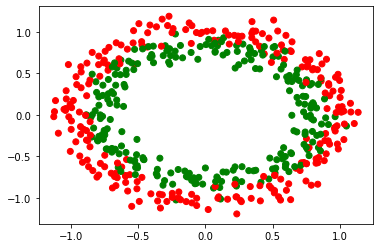

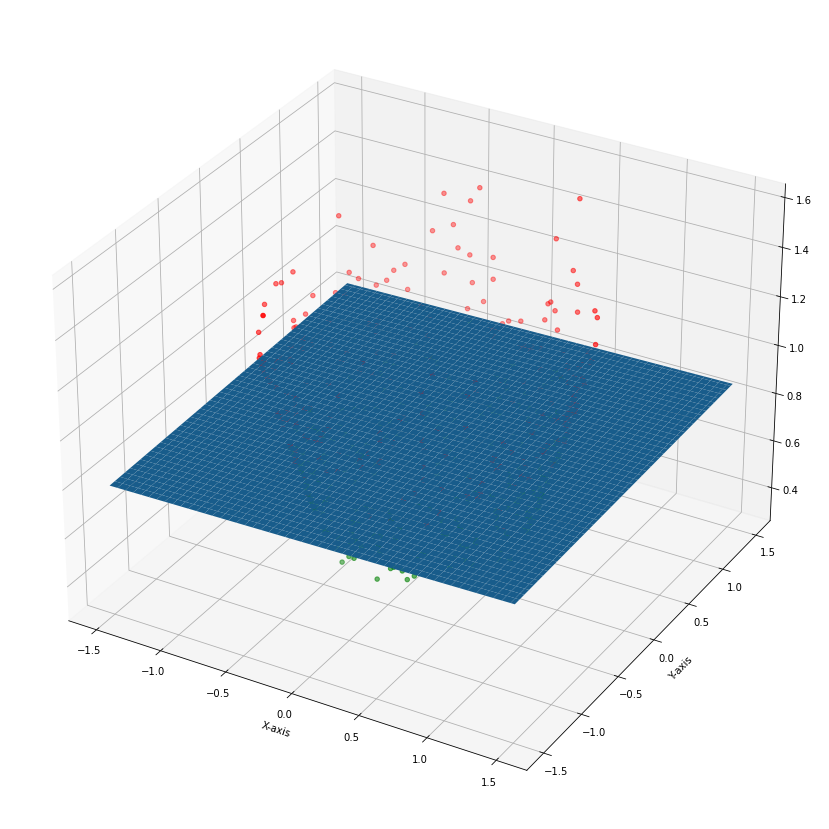

In [9]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

#2d plot, kind of hard to use linear here.
X,c = make_circles(n_samples=500, noise = 0.09)
rgb = np.array(['r','g'])
plt.scatter(X[:,0], X[:,1], color=rgb[c])
plt.show()

#3d plot, make z = x^2 + y^2
fig=plt.figure(figsize=(18,15))
ax=fig.add_subplot(111, projection='3d')
z=X[:,0]**2 +X[:,1]**2
ax.scatter(X[:,0], X[:,1], z, color=rgb[c])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

#now we can make a plane in 3d to divide the classes

features = np.concatenate((X,z.reshape(-1,1)), axis=1)
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
#formula for finding x3 (z) drived from Ax + By + Cz + d = 0
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x,y,x3(x,y))
plt.show()
